In [1]:
import sys
import pandas as pd
import matplotlib as plt

sys.path.append("../src/")
sys.path.append("../data/income/")
from matplotlib.pyplot import *


# Kleiber's law

In [2]:
data=pd.read_csv("../data/allometric/mass-BMR.csv",names=["Order","Family","Mass","BMR"])
orders = set(data['Order'])

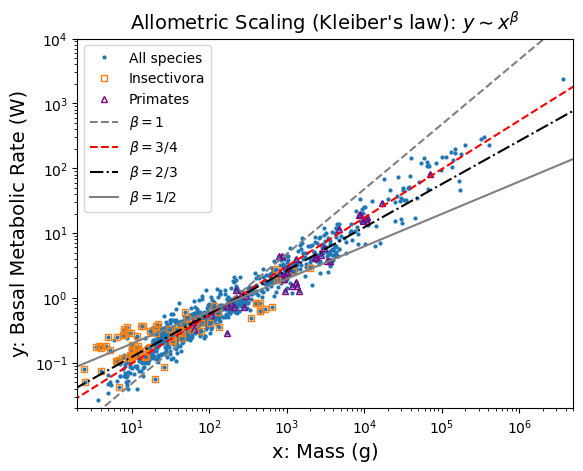

In [5]:
xs=np.array([2**i for i in range(24)])
avgx=np.sum(np.log10(data['Mass']))/len(data['Mass'])
avgy=np.sum(np.log10(data['BMR']))/len(data['BMR'])

xscale("log")
yscale("log")
plot(data['Mass'],data['BMR'],".",markersize=4,label="All species")
o1='Insectivora'
plot(data['Mass'][data['Order']==o1],data['BMR'][data['Order']==o1],"s",fillstyle="none",markersize=4,label=o1)
plot(data['Mass'][data['Order']=='Primates'],data['BMR'][data['Order']=='Primates'],"^",fillstyle="none",color="Purple",markersize=4,label="Primates")
#for o in orders:
#    plot(data['Mass'][data['Order']==o],data['BMR'][data['Order']==o],"o",label=o)
#xlim([2,2*10**6])

#plot(10**avgx,10**avgy,"X",label="average")
plot(xs,(10**avgy/np.power(10**avgx,1))*np.power(xs,1),"--",color="Gray",label=r"$\beta=1$")
plot(xs,(10**avgy/np.power(10**avgx,3/4))*np.power(xs,3/4),"--",color="Red",label=r"$\beta=3/4$")
plot(xs,(10**avgy/np.power(10**avgx,2/3))*np.power(xs,2/3),"-.",color="Black",label=r"$\beta=2/3$")
plot(xs,(10**avgy/np.power(10**avgx,1/2))*np.power(xs,1/2),"-",color="Gray",label=r"$\beta=1/2$")
legend(loc=0)
xlim(2,5*10**6)
ylim(0.02,10**4)

title(r"Allometric Scaling (Kleiber's law): $y \sim x^\beta$",fontsize=14)
xlabel("x: Mass (g)",fontsize=14)
ylabel("y: Basal Metabolic Rate (W)",fontsize=14)
savefig("fig/allometric.png",dpi=300,bbox_inches='tight')
show()

In [7]:
for o in orders:
    print(o,sum(data['Order']==o))

Peramelemorphia 7
Sirenia 2
Proboscidea 1
Notoryctomorphia 1
Macroscelidae 14
Lagomorpha 21
Diprotodontia 41
Artiodactyla 25
Dasyuromorpha 64
Carnivora 68
Chiroptera 91
Scandentia 3
Monotremata 9
Rodentia 499
Xenarthra 21
Hyracoidea 6
Primates 39
Perissodactyla 1
Insectivora 86
Pholidota 6
Tubulidentata 1


In [11]:
families = set(data['Family'])
for f in list(families)[:10]:
    print(f,sum(data['Family']==f))

Phocidae 3
Bradypodidae 1
Macropodidae 10
Caluromyidae 2
Myoxidae 5
Suidae 1
Natalidae 1
Potoroidae 5
Peditidae 1
Tupaiidae 3


In [10]:
for s in data["Mass"]:
    if s>10**6:
        print(s)

3672000.0


In [97]:
data

,Order,Family,Mass,BMR
0,Artiodactyla,Antilocapridae,32000.0,49.984
1,Artiodactyla,Antilocapridae,37800.0,51.981
2,Artiodactyla,Bovidae,347000.0,306.770
3,Artiodactyla,Bovidae,4200.0,10.075
4,Artiodactyla,Bovidae,196500.0,230.073
...,...,...,...,...
1001,Xenarthra,Myrmecophagidae,30600.0,14.543
1002,Xenarthra,Myrmecophagidae,3500.0,5.077
1003,Xenarthra,Myrmecophagidae,3977.0,5.534
1004,Xenarthra,Myrmecophagidae,4210.0,4.790


# Heartbeats

In [12]:
dataH=pd.read_csv("../data/allometric/bpm-lifespan.csv")

In [13]:
dataH

,Species,Telomere Length at Young Age (kb),Rate of Telomere Shortening (Bp/year),Maximum Lifespan (years),Average Lifespan,Heart rate (bpm),Body weight (kg)
0,Mouse,50.0,7000,4.0,2.0,700,0.021
1,Goat,10.4,363,20.8,16.5,80,61.000
2,Audouin’s gull,35.0,771,25.0,21.0,130,0.535
3,Reindeer,19.8,531,21.8,15.0,50,101.000
4,Griffon vulture,19.8,209,41.4,37.0,90,7.440
5,Bottlenose dolphin,90.7,766,51.6,17.0,40,200.000
6,American flamingo,21.0,105,60.0,40.0,-1,3.070
7,Sumatran elephant,36.3,109,65.5,60.0,30,3180.000
8,Human,15.0,71,122.5,79.0,80,62.000


In [14]:
f=dataH["Heart rate (bpm)"]>0
x=dataH["Body weight (kg)"][f]
texts=dataH["Species"][f]

In [15]:
dataH["Rate of Telomere Shortening (Bp/year)"]

0    7000
1     363
2     771
3     531
4     209
5     766
6     105
7     109
8      71
Name: Rate of Telomere Shortening (Bp/year), dtype: int64

In [16]:
dataH["Body weight (kg)"][f]

0       0.021
1      61.000
2       0.535
3     101.000
4       7.440
5     200.000
7    3180.000
8      62.000
Name: Body weight (kg), dtype: float64

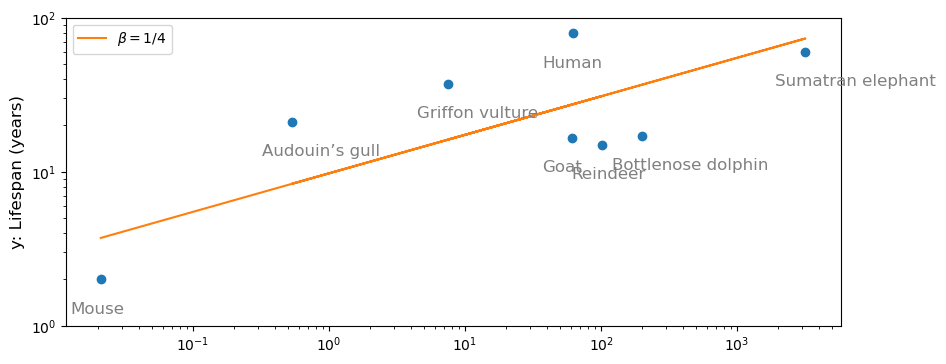

In [17]:
ylen=4
xlen=10
figure(figsize=[xlen,ylen])
x=dataH["Body weight (kg)"][f]
y=dataH["Average Lifespan"][f]
avgx = np.average(np.log10(x))
avgy = np.average(np.log10(y))
plot(x,y,"o")
plot(x,(10**avgy/np.power(10**avgx,1/4))*x**(1/4),"-",label=r"$\beta=1/4$")
for i in [0,1,2,3,4,5,7,8]:
    text(0.6*x[i],0.6*y[i],texts[i],color="Gray",fontsize=12)
ylabel("y: Lifespan (years)",fontsize=12)
ylim(1,100)
xscale("log")
yscale("log")
legend()
savefig("fig/allometric2-1.png",dpi=300,bbox_inches='tight')
show()

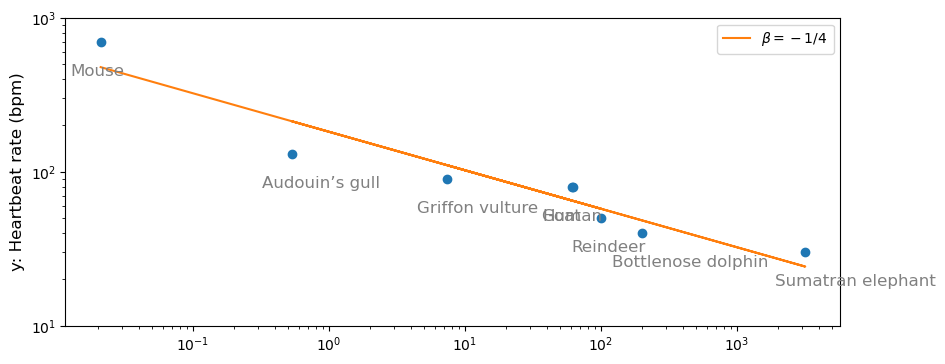

In [18]:
figure(figsize=[xlen,ylen])
x=dataH["Body weight (kg)"][f]
y=dataH["Heart rate (bpm)"][f]
avgx = np.average(np.log10(x))
avgy = np.average(np.log10(y))

plot(x,y,"o")
plot(x,(10**avgy/np.power(10**avgx,-1/4))*x**(-1/4),"-",label=r"$\beta=-1/4$")

for i in [0,1,2,3,4,5,7,8]:
    text(0.6*x[i],0.6*y[i],texts[i],color="Gray",fontsize=12)

ylabel("y: Heartbeat rate (bpm)",fontsize=12)
ylim(10,1000)
xscale("log")
yscale("log")
legend()
savefig("fig/allometric2-2.png",dpi=300,bbox_inches='tight')
show()

0.021 736344000.0 Mouse
61.0 694267200.0 Goat
0.535 1435870800.0 Audouin’s gull
101.0 394470000.0 Reindeer
7.44 1751446800.0 Griffon vulture
200.0 357652800.0 Bottlenose dolphin
3180.0 946728000.0 Sumatran elephant
62.0 3324067200.0 Human


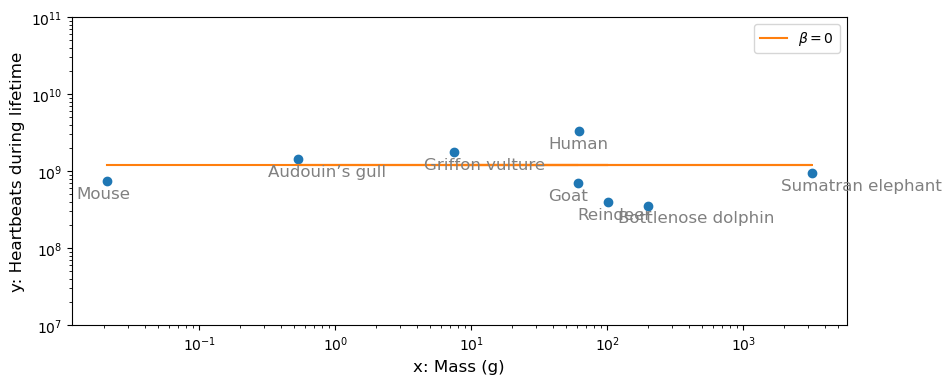

In [19]:
figure(figsize=[xlen,ylen])
beats = dataH["Heart rate (bpm)"][f]*dataH["Average Lifespan"][f]*365.25*24*60

x=dataH["Body weight (kg)"][f]
y=beats


avgy=np.average(y)

plot(x,y,"o")
plot(x,avgy*(y/y),"-",label=r"$\beta=0$")
ylim(10**7,10**11)
#text(1,avgy,"test")
for i in [0,1,2,3,4,5,7,8]:
    print(x[i],y[i],texts[i])
    text(0.6*x[i],0.6*y[i],texts[i],color="Gray",fontsize=12)

ylabel("y: Heartbeats during lifetime",fontsize=12)
xlabel("x: Mass (g)",fontsize=12)

xscale("log")
yscale("log")
legend()
savefig("fig/allometric2-3.png",dpi=300,bbox_inches='tight')
show()